In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [ ]:
data.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [ ]:
data['order_amount'].median()

284.0

Text(0.5, 1.0, 'OrderAmount vs Shop_id')

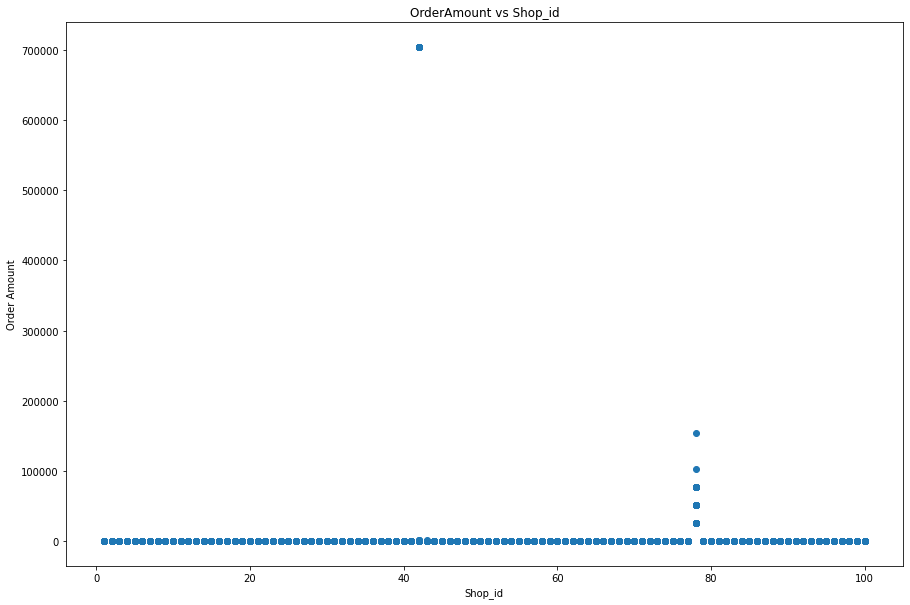

In [ ]:
plt_1 = plt.figure(figsize = (15,10))
plt.scatter(data['shop_id'],data['order_amount'])
plt.xlabel('Shop_id')
plt.ylabel('Order Amount')
plt.title('OrderAmount vs Shop_id')

In [ ]:
#this shows how much each shop sold out in orders
shop_seller_order_amount = data.groupby(data['shop_id'])['order_amount'].sum()
shop_seller_order_amount = shop_seller_order_amount.to_frame()
shop_seller_order_amount = shop_seller_order_amount.reset_index()
shop_seller_order_amount = shop_seller_order_amount.rename(columns = {'order_amount' : 'no of items ordered'})

shop_seller_order_amount.sort_values(by = ['no of items ordered'], ascending = False)

,shop_id,no of items ordered
41,42,11990176
77,78,2263800
88,89,23128
80,81,22656
5,6,22627
...,...,...
1,2,9588
99,100,8547
55,56,8073
31,32,7979


We can clearly see from above that there has been some issue with the data as the values from shop 42 is more than a hundred times the no of items ordered in other shops. Even in shop 72, there may have been an error somewhere in the recording of values.


In [ ]:
total_items_count = data.groupby(data['total_items'])['order_id'].nunique()
total_items_count = total_items_count.to_frame()
total_items_count = total_items_count.reset_index()
total_items_count = total_items_count.rename(columns = {'order_id' : 'count'})

total_items_count

,total_items,count
0,1,1830
1,2,1832
2,3,941
3,4,293
4,5,77
5,6,9
6,8,1
7,2000,17


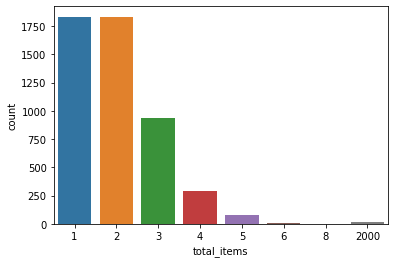

In [ ]:
sns.barplot(data = total_items_count,x='total_items', y='count')